# BALIRWA ALVIN DANIEL
## M24B13/026

In [18]:
#Importing Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats



In [2]:
#Importing dataset
housingdata=pd.read_excel("HousingData.xlsx")

In [ ]:
df = pd.read_excel('HousingData.xlsx')

In [4]:
df.head()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0


# Importing Additional libraries

In [ ]:
#Additional libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Processing Data
- Handle missing values, encode categorical variables, and standardize features if necessary

In [7]:
# Droping rows with missing 'TAX' values
df.dropna(subset=['TAX'], inplace=True)

# Handling missing values for other columns
df.fillna(0, inplace=True)

# Encoding categorical values
df = pd.get_dummies(df)


# Defining Features & Target variables
- Select the features `independent variables` and the target variable `TAX`

In [ ]:
X = df.drop('TAX', axis=1)  # These are the Features
y = df['TAX']  # This is the target variable


# Split the Data
- Split the dataset into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train The Regression Model
- Creating the linear regression model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Make Predictions
- Using the trained model to make predictions on the test set

In [11]:
y_pred = model.predict(X_test)


# Evaluate The Model
- Evaluate the model performance using `metrics`

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3439.592640505138
R-squared: 0.8897006998026676


# Visualizing The Results
- Ploting the `predicted` vs `actual values`

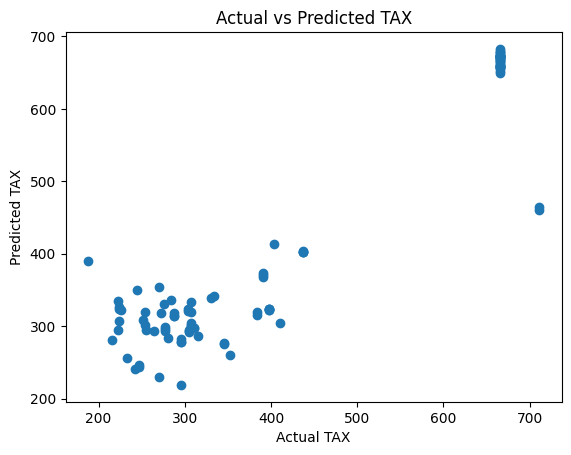

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual TAX')
plt.ylabel('Predicted TAX')
plt.title('Actual vs Predicted TAX')
plt.show()


# SAVING THE MODEL USING A PICKLE FILE
- Saving the `trained model`

In [16]:
import pickle

# Saving the model to a pickle file
model_name = 'tax_property.pkl'
with open(model_name, 'wb') as file:
    pickle.dump(model, file)

print(f"The Model has been saved as {model_name}")


The Model has been saved as tax_property.pkl


# Loading The Model For Verification
- Ensuring that the model is saved

In [17]:
# Load the model from the pickle file
with open(model_name, 'rb') as file:
    loaded_model = pickle.load(file)

# Test the loaded model
y_pred_loaded = loaded_model.predict(X_test)
print(f"Loaded Model MSE: {mean_squared_error(y_test, y_pred_loaded)}")


Loaded Model MSE: 3439.592640505138
